In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import glob
import os

In [2]:
# pth = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1"
# pth = "./models/tensorboard/visnav_lateral/behavior_pred_exp/classification/ablations_1"
pth = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1"
# get all csvs
files = glob.glob(os.path.join(pth, "**/behavior_pred.csv"), recursive=True)
print(files)

["./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_0.05_resumeFalse/behavior_before_stim_RESUMEFalse_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']/_full_finetuning_2_0.05_full_finetuning_2/sparse_f:None_id:None/w:0.05_wp:0.25/behavior_pred.csv", "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_1.0g/behavior_before_stim_RESUMEFalse_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']/_behavior_predict_no_pretraining_1.0/sparse_f:None_id:None/w:0.05_wp:0.25/behavior_pred.csv", "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_0.1_resumeTrue/behavior_before_stim_RESUMETrue_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'fram

In [3]:
from scipy.stats import pearsonr
corrs = dict()
preds = dict()
for f in files:
    behavior_preds = pd.read_csv(f)
    r, p = pearsonr(behavior_preds['behavior'], behavior_preds['true'])
    print(f.split('/')[7])
    print(f"r: {r}, p: {p}")
    behavior_results = pd.DataFrame(columns=['r', 'p'])
    parent_dir = pathlib.Path(f).parent
    behavior_results.to_csv(os.path.join(parent_dir, 'corrs.csv'), index=False)
    corrs[f.split('/')[7]] = r
    preds[f.split('/')[7]] = behavior_preds['behavior'].values

corrs["finetuning_1.0_resumeTrue"] = 0.95
# Add legend inside the plot
rename_mapping = {
    "finetuning_0.01_resumeFalse": "No Pretraining, 1%",
    "finetuning_0.01_resumeTrue": "Finetune, 1%",
    "finetuning_0.1_resumeFalse": "No Pretraining, 10%",
    "finetuning_0.1_resumeTrue": "Finetune, 10%",
    "finetuning_1.0_resumeTrue": "Full Training",
    
}
corrs = {rename_mapping[k]: v for k, v in corrs.items() if k in rename_mapping.keys()}
order = rename_mapping.values()
# reorder according to order
corrs = {k: abs(corrs[k]) for k in order if k in corrs.keys()}
preds = {k: preds[k] for k in order if k in preds.keys()}

finetuning_0.05_resumeFalse
r: 0.8262765271272162, p: 0.0
finetuning_1.0g
r: 0.9543719127634003, p: 0.0
finetuning_0.1_resumeTrue
r: 0.8647741656399891, p: 0.0
behavior_before_stim_RESUMETrue_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']_finetuning_behavior_0.1
r: 0.8259978083222603, p: 0.0
finetuning_0.2_resumeFalse
r: 0.9121698637996976, p: 0.0
finetuning_0.01_resumeFalse
r: -0.04456627974053821, p: 0.0003335105640245041
finetuning_0.01g
r: 0.14562249732688098, p: 4.934451721298942e-32
finetuning_0.1_resumeNone
r: 0.8791206794103328, p: 0.0
finetuning_0.1_resumeNone
r: 0.029831654711717, p: 0.016354051645388695
finetuning_0.2_resumeTrue
r: 0.8996133720595597, p: 0.0
finetuning_0.01_resumeTrue
r: 0.5079519507872615, p: 0.0
finetuning_0.1g
r: 0.05705852256284127, p: 4.329229850956206e-06
finetuning_0.1_resumeFalse
r: 0.33029007469775035, p: 1.1520690670430495e-164


In [4]:
corrs

{'No Pretraining, 1%': 0.04456627974053821,
 'Finetune, 1%': 0.5079519507872615,
 'No Pretraining, 10%': 0.33029007469775035,
 'Finetune, 10%': 0.8647741656399891,
 'Full Training': 0.95}

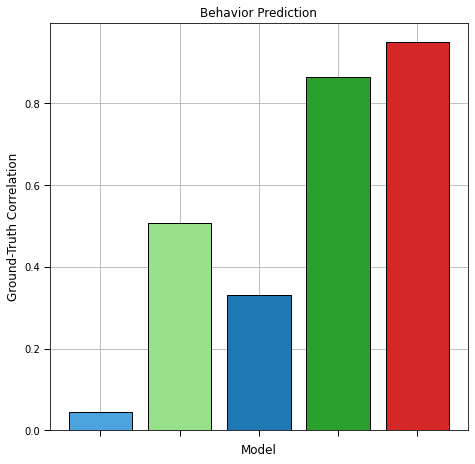

In [5]:
import collections
import os
import matplotlib.pyplot as plt
from neuroformer.visualize import set_plot_white, nature_style

# nature_style()
set_plot_white()

# corrs = collections.OrderedDict(sorted(correlations.items(), key=lambda x: x[1]))
# wanted_correlations = ["no_pretraining_0.01", "no_pretraining_0.1", 
#                        "finetuning_0.01", "finetuning_0.1",
#                        "full_training"]

# corrs = {k: v for k, v in corrs.items() if k in wanted_correlations}

colors = ['#4ca3dd', '#98df8a', '#1f77b4', '#2ca02c', '#d62728']

plt.figure(figsize=(7.5, 7.5))
plt.grid(zorder=0)
# send grid to back
plt.gca().set_axisbelow(True)

plt.title("Behavior Prediction", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Ground-Truth Correlation", fontsize=12)

bars = plt.bar(range(len(corrs.values())), corrs.values(),
        color=[colors[i] for i in range(len(corrs))], edgecolor='black', linewidth=1)

# set label size
plt.xticks(fontsize=12)

# Remove tick labels
plt.gca().set_xticklabels([])
plt.gca().tick_params(axis='both', direction='out', length=6, width=1)
# plt.legend(bars, labels, loc='upper left', fontsize=12)


# set range of figure from -0.1 to 0.7
# plt.ylim(-0.1, 0.7)

# Save plots
# plt.savefig(os.path.join("./models/tensorboard/visnav/behavior_predict/plots", f"corr_bar.png"))
# plt.savefig(os.path.join("./models/tensorboard/visnav/behavior_predict/plots", f"corr_bar.pdf"))

plt.show()

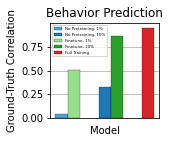

In [6]:
import collections
import os
import matplotlib.pyplot as plt
from neuroformer.visualize import set_plot_white, nature_style, set_research_params

# nature_style()
set_plot_white()
# set_research_params()


# corrs = collections.OrderedDict(sorted(correlations.items(), key=lambda x: x[1]))
# wanted_correlations = ["no_pretraining_0.01", "no_pretraining_0.1", 
#                        "finetuning_0.01", "finetuning_0.1",
#                        "full_training"]

# corrs = {k: v for k, v in corrs.items() if k in wanted_correlations}

colors = ['#4ca3dd', '#98df8a', '#1f77b4', '#2ca02c', '#d62728']

color_dict = {
    "No Pretraining, 1%": '#4ca3dd',
    "Finetune, 1%": '#98df8a',
    "No Pretraining, 10%": '#1f77b4',
    "Finetune, 10%": '#2ca02c',
}

plt.figure(figsize=(1.95, 1.75))
plt.grid(zorder=0, axis='y')
# send grid to back
plt.gca().set_axisbelow(True)

plt.title("Behavior Prediction")
plt.xlabel("Model")
plt.ylabel("Ground-Truth Correlation")

# Define bar width
bar_width = 0.8

# Create a list for bar positions
positions = [0, bar_width, 2 + bar_width, 2 + 2*bar_width, 4 + 2*bar_width]

bars = plt.bar(positions, list(corrs.values()), width=bar_width,
        color=[colors[i] for i in range(len(corrs))], edgecolor='black', linewidth=0.25)

# set label size
plt.xticks([pos + bar_width/2 for pos in positions])

# Remove tick labels
plt.gca().set_xticklabels([])
plt.gca().tick_params(axis='both', direction='out')
# disable x tick markers
plt.gca().tick_params(axis='x', length=0)

# add legend manually
rename_mapping = {
    "finetuning_0.01_resumeFalse": "No Pretraining, 1%",
    "finetuning_0.01_resumeTrue": "Finetune, 1%",
    "finetuning_0.1_resumeFalse": "No Pretraining, 10%",
    "finetuning_0.1_resumeTrue": "Finetune, 10%",
    "finetuning_1.0_resumeTrue": "Full Training",
    
}
legend_order = ["No Pretraining, 1%", "No Pretraining, 10%", "Finetune, 1%", "Finetune, 10%", "Full Training"]
bars = [bars[i] for i in [0, 2, 1, 3, 4]]
plt.legend(bars, legend_order, loc='upper left')
# make legend smaller
plt.legend(bars, legend_order, loc='upper left', fontsize=4)

save_path = "./results/finetune"
plt.savefig(os.path.join(save_path, f"corr_bar.pdf"), bbox_inches='tight')
plt.savefig(os.path.join(save_path, f"corr_bar.png"), bbox_inches='tight')

In [7]:
# exp_mlp = "./results/behavior"
# exp_mlp_files = glob.glob(os.path.join(exp_mlp, "**/**.csv"), recursive=True)

In [8]:
# get folders in dir
base_directory = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1"
folders = [os.path.join(base_directory, f) for f in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, f))]
# get all files in base_dir that are events.out.tfevents
folders = glob.glob(os.path.join(base_directory, "**", "events.out.tfevents*"), recursive=True)
print(folders)

["./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_0.05_resumeFalse/behavior_before_stim_RESUMEFalse_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']/_full_finetuning_2_0.05_full_finetuning_2/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.2_df:0.005_blocksize:100_conv_True_shuffle:True_batch:224_sparse_(None_None)_blocksz446_pos_emb:False_temp_emb:True_drop:0.35_dt:True_2.0_52_max0.005_(8, 8, 8)_8_256/events.out.tfevents.1684011955.dipsy.edc.iee.ucsb.edu.1335477.0", "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_0.05_resumeFalse/behavior_before_stim_RESUMEFalse_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']/_full_finetuning_2_0.05_full_finetuning_2/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:Fals

In [9]:
folders = []

In [10]:
rename_mapping

{'finetuning_0.01_resumeFalse': 'No Pretraining, 1%',
 'finetuning_0.01_resumeTrue': 'Finetune, 1%',
 'finetuning_0.1_resumeFalse': 'No Pretraining, 10%',
 'finetuning_0.1_resumeTrue': 'Finetune, 10%',
 'finetuning_1.0_resumeTrue': 'Full Training'}

In [11]:
log_file = "/share/edc/home/antonis/neuroformer/models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_0.1_resumeFalse"
glob.glob(os.path.join(log_file, "**/events.out.tfevents*"), recursive=True)[0]

"/share/edc/home/antonis/neuroformer/models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_0.1_resumeFalse/behavior_before_stim_RESUMEFalse_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']/_full_finetuning_2_0.1_full_finetuning_2/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.2_df:0.005_blocksize:100_conv_True_shuffle:True_batch:224_sparse_(None_None)_blocksz446_pos_emb:False_temp_emb:True_drop:0.35_dt:True_2.0_52_max0.005_(8, 8, 8)_8_256/events.out.tfevents.1684165971.tinkywinky.edc.iee.ucsb.edu.377358.0"

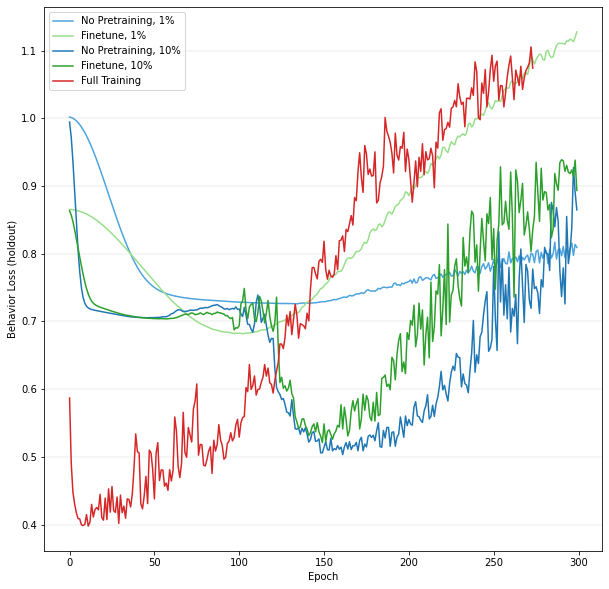

In [12]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns
from neuroformer.visualize import nature_style
# nature_style()
# set_research_params()

y_keys = ["Loss/test_behavior"]
y_key_labels = ["Behavior Loss"]
n_epochs = 300

# fig.suptitle("Eye pos vs. None, Lateral DS")
# fig.text(0.5, 0.04, "Epoch", ha="center", va="center")
# fig.text(0.06, 0.5, "Neural Decoding Loss", ha="center", va="center", rotation=90)

color_dict = {
    "No Pretraining, 1%": '#4ca3dd',
    "Finetune, 1%": '#98df8a',
    "No Pretraining, 10%": '#1f77b4',
    "Finetune, 10%": '#2ca02c',
    "Full Training": '#d62728',
}


log_path = "/share/edc/home/antonis/neuroformer/models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1"
plt.figure(figsize=(10, 10))
for n_file, log_name in enumerate(rename_mapping.keys()):
        log_file = os.path.join(log_path, log_name)
        # find file that starts with events.out.tfevents
        log_file = glob.glob(os.path.join(log_file, "**/events.out.tfevents*"), recursive=True)[0]
        key = log_file.split("/")[-1]
        key_title = rename_mapping[log_name]
        for idx, y_key in enumerate(y_keys):
            event_accumulator = EventAccumulator(log_file)
            # print(event_accumulator.Tags())
            event_accumulator.Reload()
            tags = event_accumulator.Tags()['scalars']
            if y_key in tags:
                values = event_accumulator.Scalars(y_key)
                steps = [v.step for v in values][:n_epochs]
                values = [v.value for v in values][:n_epochs]
                data = pd.DataFrame({"steps": steps, key_title: values})
                # sns.lineplot(data=data, x="steps", y=key_title, ax=axs[idx//2, idx%2], label=key_title, color=color_dict[key_title])
                plt.plot(steps, values, label=key_title, color=color_dict[key_title])

plt.legend()
plt.grid(zorder=0, axis='y', linewidth=0.2)
plt.xlabel("Epoch")
plt.ylabel("Behavior Loss (holdout)")

plt.savefig(os.path.join(save_path, f"losses.pdf"), bbox_inches='tight')
plt.savefig(os.path.join(save_path, f"losses.png"), bbox_inches='tight')


# ax.get_legend().remove()
# make background non-transparent
# fig.patch.set_alpha(1)
# plt.tight_layout()

# save_path = "./models/tensorboard/visnav/behavior_pred_exp/plots"
plt.savefig(os.path.join(save_path, "losses.png"), dpi=300)
plt.savefig(os.path.join(save_path, "losses.pdf"), dpi=300)

In [13]:
# /share/edc/home/antonis/neuroformer/models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_0.01_resumeFalse
# /share/edc/home/antonis/neuroformer/models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_0.01_resumeFalse